In [1]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.
from sklearn.model_selection import LeaveOneOut # Leave One Out Cross Validation --> this is inefficient and expensive

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules
from sklearn.linear_model import LogisticRegression as LR
from sklearn import svm #might take a while 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #probably not worth it 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #probably not worth it
import xgboost as xgb #gradient boosting #probably not worth it
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Warnings
import warnings
warnings.filterwarnings("ignore")

#show me what you got
pd.set_option("display.max_rows", None, "display.max_columns", None)

import terality as te

You are using version 0.12.18 of the Terality client, but version 0.12.25 is available. Consider upgrading your version to get the latest fixes and features.


## Goal: Two Ideas (go with whatever works better)
### 1: Predict/Classify when a person will die (use injury level = fatality column)

#### i.e., Given that an individual is involved in a traffic accident, what predicts if that individual will die??

In [ ]:
# run the model interpretation with the variables we see it choosing

In [2]:
data = pd.read_csv("General_Clean_2019")

In [3]:
Use = data[[    
    'STATENAME_x',
    'DAY_x',
    'MONTHNAME_x', 
    'HOUR_x',
    'MINUTE_x',
    'NUMOCCS',
    'HARM_EVNAME_x',
    'MAN_COLLNAME_x',
    'REG_STATNAME', 
    'MAKENAME_x',
    'MAK_MODNAME',
    'BODY_TYP_x',
    'MOD_YEARNAME_x',
    'GVWRNAME',
    'V_CONFIGNAME',
    'TRAV_SPNAME', 
    'ROLLOVERNAME_x',
    'ROLINLOCNAME',
    'IMPACT1NAME_x',
    'DEFORMEDNAME',
    'VEH_SC1NAME',
    'VEH_SC2NAME', 
    'L_COMPLNAME',
    'L_RESTRINAME',
    'FIRST_YRNAME', 
    'LAST_YR',
    'SPEEDRELNAME',
    'DR_SF1NAME',
    'DR_SF2NAME',
    'DR_SF3NAME',
    'DR_SF4NAME',
    'VTRAFWAYNAME',
    'VNUM_LANNAME',
    'VSPD_LIMNAME', 
    'VALIGNNAME',
    'VPROFILENAME',
    'VPAVETYPNAME',
    'VSURCONDNAME',
    'VTRAFCONNAME',
    'VTCONT_FNAME',
    'P_CRASH1NAME',
    'P_CRASH2NAME',
    'P_CRASH3NAME',
    'PCRASH4NAME',
    'PCRASH5NAME',
    'ACC_TYPENAME',
    'DR_DRINKNAME',
    'RUR_URBNAME_x',
    'FUNC_SYSNAME_x',
    'AGE', 
    'SEXNAME',
    'PER_TYPNAME',
    'INJ_SEVNAME',
    'SEAT_POSNAME',
    'REST_USENAME',
    'REST_MISNAME',
    'AIR_BAGNAME',
    'DRINKINGNAME',
    'DRUGSNAME',
    'P_SF1NAME',
    'P_SF2NAME',
    'P_SF3NAME',
    'LOCATIONNAME',
    'PERMVIT',
    'PERNOTMVIT',
    'DAY_WEEKNAME',
    'ROUTENAME',
    'RD_OWNERNAME',
    'TYP_INTNAME',
    'WRK_ZONENAME',
    'REL_ROADNAME',
    'LGT_CONDNAME',
    'WEATHER1NAME',
    'WEATHER2NAME',
    'WEATHERNAME',
    'HELM_USENAME',
    'CF1NAME',
    'CF2NAME',
    "CF3NAME",
    'RAILNAME',
    'PREV_ACCNAME',
    'PREV_SUS1',
    'PREV_SUS2',
    'PREV_SUS3',
    'PREV_DWI',
    'PREV_SPD',
    'PREV_OTH',
    "DRUNK_DR"]]

In [4]:
df_dummies = pd.get_dummies(Use,columns=[
    'STATENAME_x',
    'NUMOCCS',
    'DAY_x',
    'MONTHNAME_x', 
    'HOUR_x',
    'MINUTE_x',
    'HARM_EVNAME_x',
    'MAN_COLLNAME_x',
    'REG_STATNAME', 
    'MAKENAME_x',
    'MAK_MODNAME',
    'BODY_TYP_x',
    'MOD_YEARNAME_x',
    'GVWRNAME',
    'V_CONFIGNAME',
    'TRAV_SPNAME', 
    'ROLLOVERNAME_x',
    'ROLINLOCNAME',
    'IMPACT1NAME_x',
    'DEFORMEDNAME',
    'VEH_SC1NAME',
    'VEH_SC2NAME', 
    'L_COMPLNAME',
    'L_RESTRINAME',
    'FIRST_YRNAME', 
    'LAST_YR',
    'SPEEDRELNAME',
    'DR_SF1NAME',
    'DR_SF2NAME',
    'DR_SF3NAME',
    'DR_SF4NAME',
    'VTRAFWAYNAME',
    'VNUM_LANNAME',
    'VSPD_LIMNAME', 
    'VALIGNNAME',
    'VPROFILENAME',
    'VPAVETYPNAME',
    'VSURCONDNAME',
    'VTRAFCONNAME',
    'VTCONT_FNAME',
    'P_CRASH1NAME',
    'P_CRASH2NAME',
    'P_CRASH3NAME',
    'PCRASH4NAME',
    'PCRASH5NAME',
    'ACC_TYPENAME',
    'DR_DRINKNAME', 
    'RUR_URBNAME_x',
    'FUNC_SYSNAME_x',
    'SEXNAME',
    'PER_TYPNAME',
    'INJ_SEVNAME',
    'SEAT_POSNAME',
    'REST_USENAME',
    'REST_MISNAME',
    'AIR_BAGNAME',
    'DRINKINGNAME',
    'DRUGSNAME',
    'P_SF1NAME',
    'P_SF2NAME',
    'P_SF3NAME',
    'LOCATIONNAME',
    'DAY_WEEKNAME',
    'ROUTENAME',
    'RD_OWNERNAME',
    'TYP_INTNAME',
    'WRK_ZONENAME',
    'REL_ROADNAME',
    'HELM_USENAME',
    'LGT_CONDNAME',
    'WEATHER1NAME',
    'WEATHER2NAME',
    'WEATHERNAME',
    'CF1NAME',
    'PERMVIT',
    'PERNOTMVIT',
    'CF2NAME',
    "CF3NAME",
    'RAILNAME',
    'PREV_ACCNAME',
    'PREV_SUS1',
    'PREV_SUS2',
    'PREV_SUS3',
    'PREV_DWI',
    'PREV_SPD',
    'PREV_OTH',
    "DRUNK_DR" ])


In [5]:
#drop other types of injury outcomes because there's perfect multicollinearity "INJ_SEVNAME_Died Prior to Crash*", "INJ_SEVNAME_Injured, Severity Unknown", "INJ_SEVNAME_No Apparent Injury (O)", "NJ_SEVNAME_Possible Injury (C)" "INJ_SEVNAME_Suspected Minor Injury (B)" "INJ_SEVNAME_Suspected Serious Injury (A)", "INJ_SEVNAME_Unknown/Not Reported"
df_dummies.drop(columns=['INJ_SEVNAME_Died Prior to Crash*', "INJ_SEVNAME_Injured, Severity Unknown", "INJ_SEVNAME_No Apparent Injury (O)", "INJ_SEVNAME_Possible Injury (C)", "INJ_SEVNAME_Suspected Minor Injury (B)", "INJ_SEVNAME_Suspected Serious Injury (A)", "INJ_SEVNAME_Unknown/Not Reported"], axis=1, inplace=True)


df_dummies = df_dummies.dropna()

Y = df_dummies[["INJ_SEVNAME_Fatal Injury (K)"]]       
X = df_dummies.drop(columns=["INJ_SEVNAME_Fatal Injury (K)"])
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = .75, random_state=123)

In [6]:
df_dummies.head() 

AGE  STATENAME_x_Alabama  STATENAME_x_Alaska  STATENAME_x_Arizona  \
0  34.0                    1                   0                    0   
1  53.0                    1                   0                    0   
2  59.0                    1                   0                    0   
3  42.0                    1                   0                    0   
4  54.0                    1                   0                    0   

   STATENAME_x_Arkansas  STATENAME_x_California  STATENAME_x_Colorado  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       0                     0   

   STATENAME_x_Connecticut  STATENAME_x_Delaware  \
0                        0                     0   
1                        0                     0   
2                        0                     0   
3                        0                     0   
4                        0                     0   

   STATENAME_x_District of Columbia  STATENAME_x_Florida  STATENAME_x_Georgia  \
0                                 0                    0                    0   
1                                 0                    0                    0   
2                                 0                    0                    0   
3                                 0                    0                    0   
4                                 0                    0                    0   

   STATENAME_x_Hawaii  STATENAME_x_Idaho  STATENAME_x_Illinois  \
0                   0                  0                     0   
1                   0                  0                     0   
2                   0                  0                     0   
3                   0                  0                     0   
4                   0                  0                     0   

   STATENAME_x_Indiana  STATENAME_x_Iowa  STATENAME_x_Kansas  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   STATENAME_x_Kentucky  STATENAME_x_Louisiana  STATENAME_x_Maine  \
0                     0                      0                  0   
1                     0                      0                  0   
2                     0                      0                  0   
3                     0                      0                  0   
4                     0                      0                  0   

   STATENAME_x_Maryland  STATENAME_x_Massachusetts  STATENAME_x_Michigan  \
0                     0                          0                     0   
1                     0                          0                     0   
2                     0                          0                     0   
3                     0                          0                     0   
4                     0                          0                     0   

   STATENAME_x_Minnesota  STATENAME_x_Mississippi  STATENAME_x_Missouri  \
0                      0                        0                     0   
1                      0                        0                     0   
2                      0                        0                     0   
3                      0                        0                     0   
4                      0                        0                     0   

   STATENAME_x_Montana  STATENAME_x_Nebraska  STATENAME_x_Nevada  \
0                    0                     0                   0   
1                    0                     0                   0   
2                

In [7]:
df_dummies.shape

(82220, 2851)

In [8]:
#pre-processing
# Scale data 
scaler = pp.MinMaxScaler()
col_names = list(test_X)
test_X = scaler.fit_transform(test_X)

# Convert back into data frame
test_X = pd.DataFrame(test_X,columns=col_names)

# Scale test data 
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)

In [9]:
# more pre processing stuff like hw

In [9]:
use_metrics = ["neg_mean_squared_error"]

In [10]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=1234)

In [11]:
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

In [12]:
search_space = [
        
    # Logistic Regression
    {'model' : [LR()]},
    
]

In [13]:
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

In [14]:
search.fit(train_X,train_Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4, param_grid=[{'model': [LogisticRegression()]}],
             scoring='roc_auc')

In [15]:
search.best_score_

0.9201356050084243

In [16]:
search.best_params_

{'model': LogisticRegression()}

In [17]:
rf_mod = search.best_estimator_

In [18]:
m.roc_auc_score(train_Y,rf_mod.predict_proba(train_X)[:,1])

0.9471690073801384

In [19]:
#idk what this means and I don't rly care because I'm not focused on it!
m.accuracy_score(train_Y,rf_mod.predict(train_X))

0.8673801994648505

##### ROC Curve: Visualizing Training Data

In [21]:
lr = LR()
lr.fit(train_X, train_Y)
y_pred = lr.predict(train_X)
m.accuracy_score(train_Y,y_pred)
m.roc_auc_score(train_Y,y_pred)
probs = lr.predict_proba(train_X)
probs =  pd.DataFrame(probs,columns=lr.classes_)
probs.head()

,0,1
0,0.675444,0.324556
1,0.897543,0.102457
2,0.999938,0.000062
3,0.765061,0.234939
4,0.709225,0.290775


In [22]:
False_Positive_Rate, True_Positive_Rate, thresholds = m.roc_curve(train_Y, probs[1])

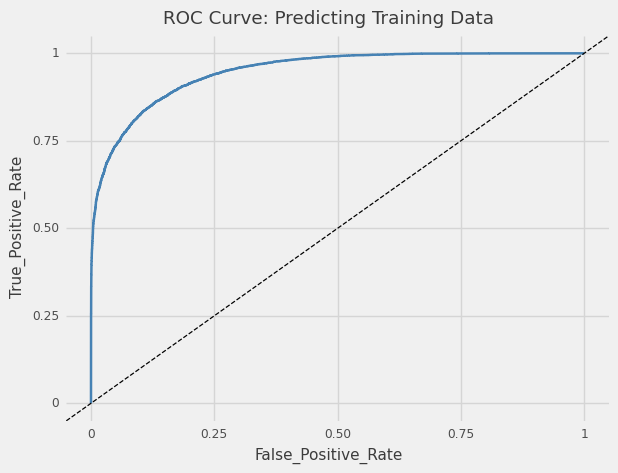

<ggplot: (148200626047)>

In [23]:
# Plot the ROC Curve
( 
    ggplot(pd.DataFrame(dict(False_Positive_Rate=False_Positive_Rate,True_Positive_Rate=True_Positive_Rate)),
           aes(x="False_Positive_Rate",y="True_Positive_Rate")) +
    geom_path(color="steelblue",size=1) +
    geom_abline(intercept=0,slope=1,linetype="dashed") +
    theme_minimal() +
    labs(title="ROC Curve: Predicting Training Data") +
    theme_538() + theme(figure_size=(7,5))
)

##### ROC Curve: Visualizing Test Data

In [24]:
lr = LR()
lr.fit(train_X, train_Y)
y_pred = lr.predict(test_X)
m.accuracy_score(test_Y,y_pred)
m.roc_auc_score(test_Y,y_pred)
probs = lr.predict_proba(test_X)
probs =  pd.DataFrame(probs,columns=lr.classes_)
probs.head()

,0,1
0,0.042677,0.957323
1,0.990632,0.009368
2,0.996123,0.003877
3,0.944979,0.055021
4,0.017864,0.982136


In [25]:
False_Positive_Rate, True_Positive_Rate, thresholds = m.roc_curve(test_Y, probs[1])

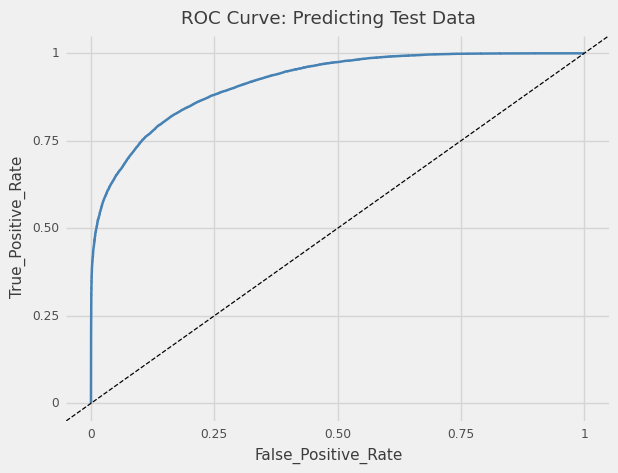

<ggplot: (148201849766)>

In [26]:
# Plot the ROC Curve
( 
    ggplot(pd.DataFrame(dict(False_Positive_Rate=False_Positive_Rate,True_Positive_Rate=True_Positive_Rate)),
           aes(x="False_Positive_Rate",y="True_Positive_Rate")) +
    geom_path(color="steelblue",size=1) +
    geom_abline(intercept=0,slope=1,linetype="dashed") +
    theme_minimal() +
    labs(title="ROC Curve: Predicting Test Data") +
    theme_538() + theme(figure_size=(7,5))
)

#### Test Data!

In [27]:
m.roc_auc_score(test_Y,rf_mod.predict_proba(test_X)[:,1])

0.9178241634389434

In [28]:
m.accuracy_score(test_Y,rf_mod.predict(test_X))

0.832384659044839

### Model Interpretation

#### Variable Importance Model

In [29]:
vi = permutation_importance(rf_mod,train_X,train_Y,n_repeats=1)

vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                          vi = vi['importances_mean'],
                          std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)



In [276]:
vi_dat.head(100)

,variable,vi,std,low,high
0,PERMVIT_1,0.067234,0.0,0.067234,0.067234
1,PERNOTMVIT_0,0.046363,0.0,0.046363,0.046363
2,PERNOTMVIT_1,0.040477,0.0,0.040477,0.040477
3,NUMOCCS_1.0,0.025395,0.0,0.025395,0.025395
4,SEXNAME_Male,0.019168,0.0,0.019168,0.019168
5,SEXNAME_Female,0.017319,0.0,0.017319,0.017319
6,DEFORMEDNAME_Disabling Damage,0.016054,0.0,0.016054,0.016054
7,HARM_EVNAME_x_Pedestrian,0.012990,0.0,0.012990,0.012990
8,HELM_USENAME_Not Applicable,0.011579,0.0,0.011579,0.011579
9,ACC_TYPENAME_C13-Single Driver-Forward Impact-...,0.010849,0.0,0.010849,0.010849


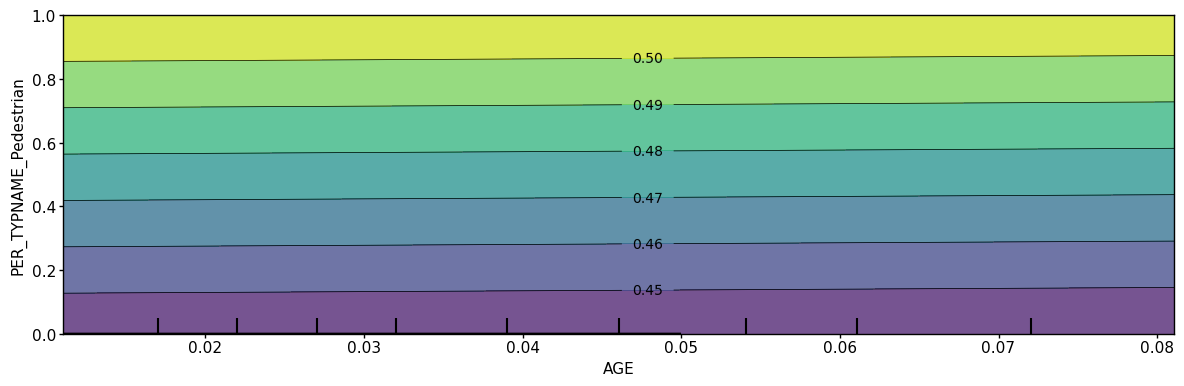

In [337]:
interacted_features = [["AGE", "PER_TYPNAME_Pedestrian"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

# effect doesn't matter across ages. I checked this same deal across different variables (age with urban, etc) 
# and there's no interaction with age

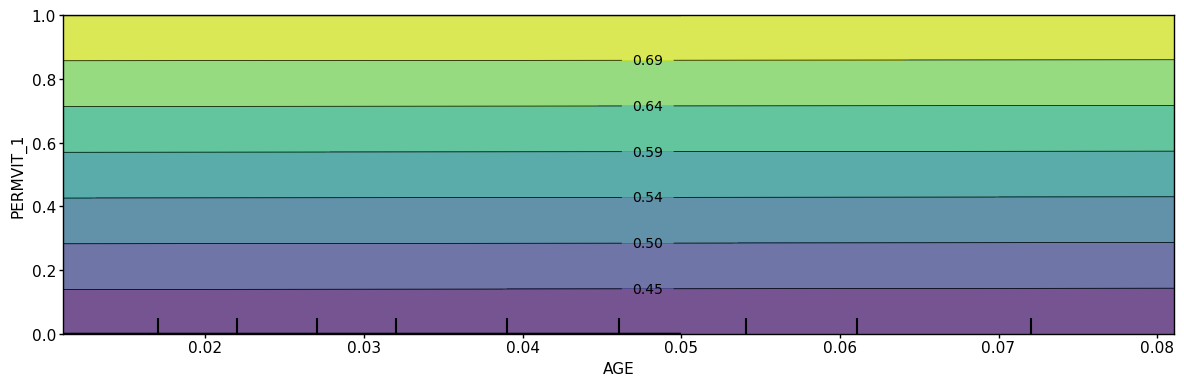

In [340]:
interacted_features = [["AGE", "PERMVIT_1"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

## Re-run with only best variables

In [343]:
vi_dat1 = vi_dat.head(300)
test = vi_dat1["variable"]
test.to_frame(name='variable')
test1 = test.reset_index()
#test1 = test1[["variable", "index"]]
#test1.T
list_of_names = test1['variable'].to_list()

In [344]:
df_newX = train_X[list_of_names]

In [345]:
search.fit(df_newX,train_Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4, param_grid=[{'model': [LogisticRegression()]}],
             scoring='roc_auc')

In [346]:
search.best_params_

{'model': LogisticRegression()}

In [347]:
rf_mod = search.best_estimator_

In [348]:
m.roc_auc_score(train_Y,rf_mod.predict_proba(df_newX)[:,1])

0.9333068401498654

In [349]:
m.accuracy_score(train_Y,rf_mod.predict(df_newX))

0.8500608124543907

In [350]:
## test data
df_newtestX = test_X[list_of_names]
m.roc_auc_score(test_Y,rf_mod.predict_proba(df_newtestX)[:,1])

0.9200020366233459

In [ ]:
# So I re-ran the model with only the top 1000 variables. Why 1000? Because we see that about 900 matter from the 
# permutation test, so I went up to 1000 to be safe since only using 1 attempt on that.
# The results show that our training data becomes less predictive, but our test data is more predictive.
# So, this means we slightly over fit in the first model.

# When I ran with only the top 300 variables, I got the highest test data score. Essentially the same conclusion.

In [237]:
vi = permutation_importance(rf_mod,df_newX,train_Y,n_repeats=1)

vi_dat_2 = pd.DataFrame(dict(variable=df_newX.columns,
                          vi = vi['importances_mean'],
                          std = vi['importances_std']))

# Generate intervals
vi_dat_2['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat_2['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat_2 = vi_dat_2.sort_values(by="vi",ascending=False).reset_index(drop=True)


In [241]:
vi_dat_2.head(10)

,variable,vi,std,low,high
0,PERMVIT_1,0.068402,0.0,0.067234,0.067234
1,PERNOTMVIT_0,0.045634,0.0,0.046363,0.046363
2,PERNOTMVIT_1,0.036050,0.0,0.040477,0.040477
3,NUMOCCS_1.0,0.026660,0.0,0.025395,0.025395
4,SEXNAME_Female,0.020530,0.0,0.017319,0.017319
5,SEXNAME_Male,0.020482,0.0,0.019168,0.019168
6,DEFORMEDNAME_Disabling Damage,0.017417,0.0,0.016054,0.016054
7,"SEAT_POSNAME_Front Seat, Left Side",0.010411,0.0,0.006324,0.006324
8,HARM_EVNAME_x_Pedestrian,0.009973,0.0,0.012990,0.012990
9,HELM_USENAME_Not Applicable,0.009195,0.0,0.011579,0.011579


#### Partial Dependency Plots

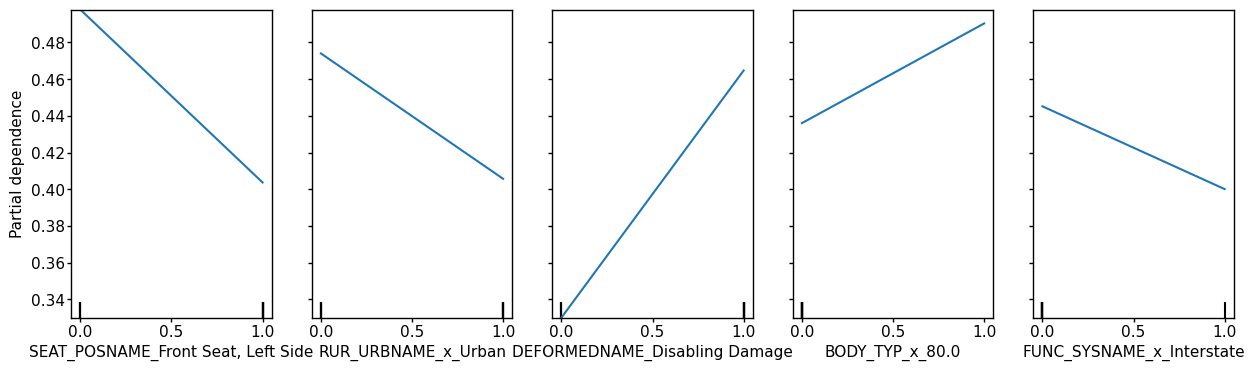

In [356]:
features = ["SEAT_POSNAME_Front Seat, Left Side", "RUR_URBNAME_x_Urban", "DEFORMEDNAME_Disabling Damage", "BODY_TYP_x_80.0", "FUNC_SYSNAME_x_Interstate"]

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

#just try plugging in interesting ideas here

# seeing that interstates aren't as dangerous as people like to pretend 
# we're predicting urban places as safer. That's a finding in itself as well

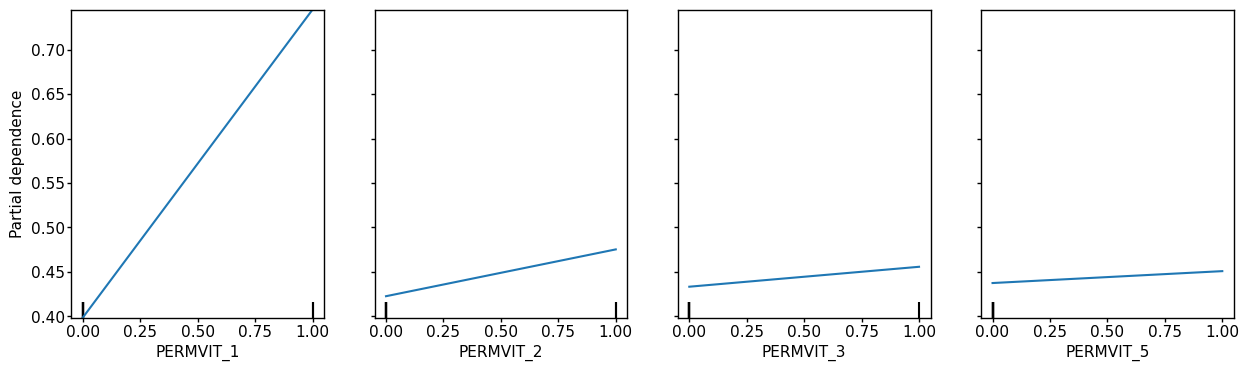

In [320]:
features = ["PERMVIT_1", "PERMVIT_2", "PERMVIT_3", "PERMVIT_5"]

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

# this is a really interesting result. Having just 1 person in a car is pretty dangerous

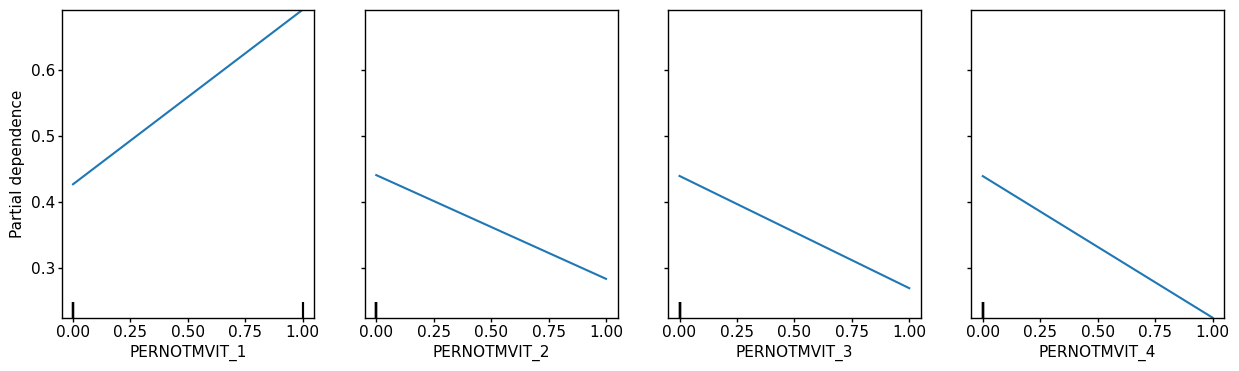

In [355]:
features = ["PERNOTMVIT_1", "PERNOTMVIT_2", "PERNOTMVIT_3", "PERNOTMVIT_4"]

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

# this is a really interesting result. As expected, when there are multiple non-drivers, they are all safer

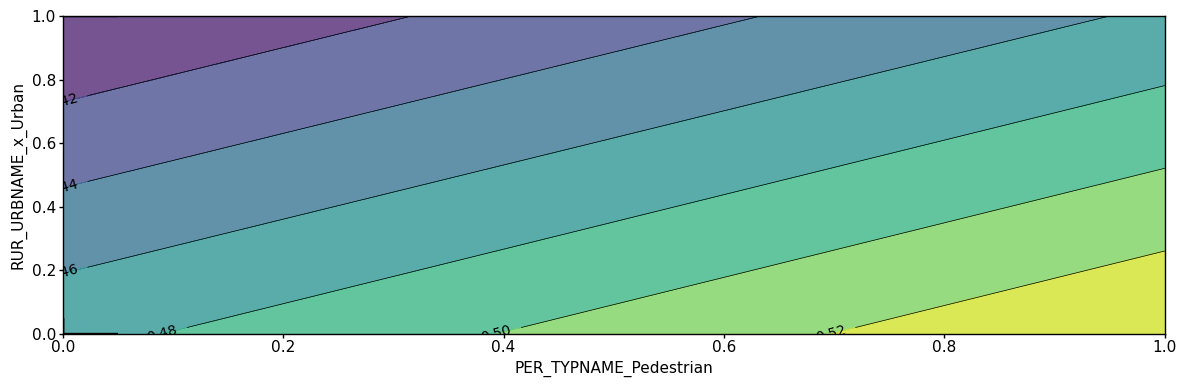

In [282]:
# Feed in the ineraction as a nested list
interacted_features = [["PER_TYPNAME_Pedestrian", "RUR_URBNAME_x_Urban"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

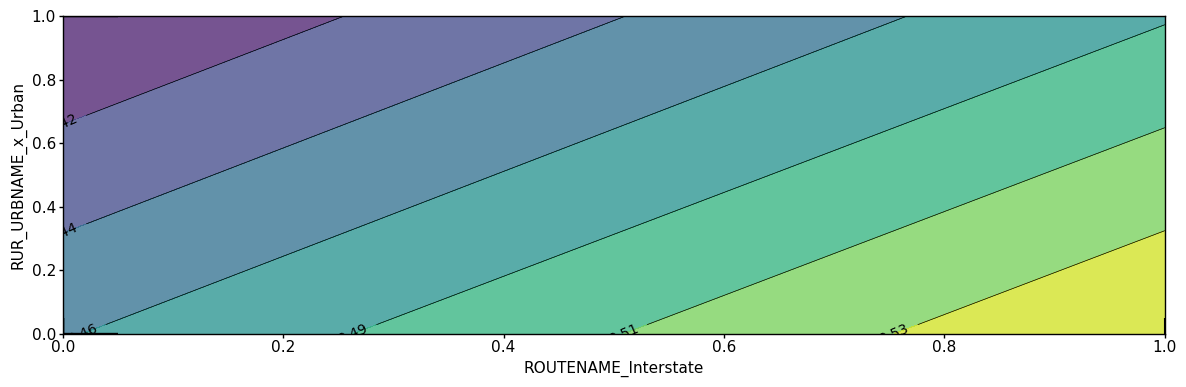

In [285]:
# Feed in the ineraction as a nested list
interacted_features = [["ROUTENAME_Interstate", "RUR_URBNAME_x_Urban"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

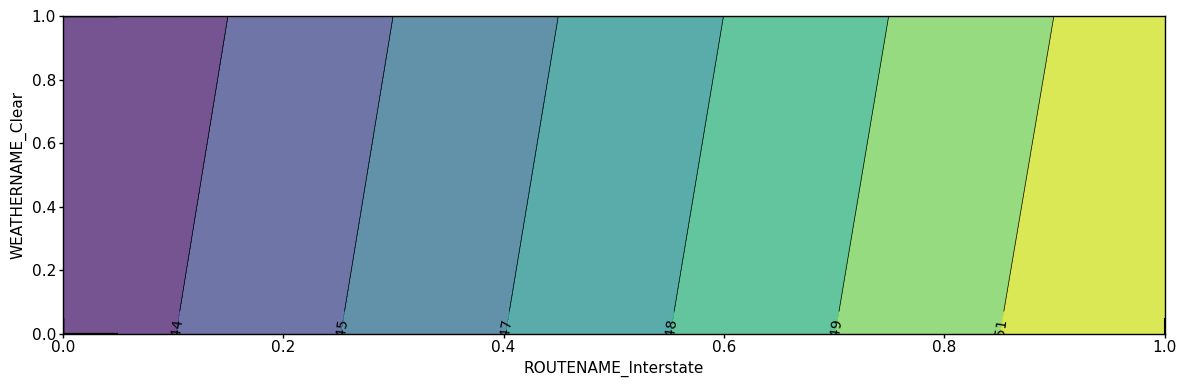

In [283]:
# Feed in the ineraction as a nested list
interacted_features = [["ROUTENAME_Interstate", "WEATHERNAME_Clear"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

#not dependent on the weather here. 

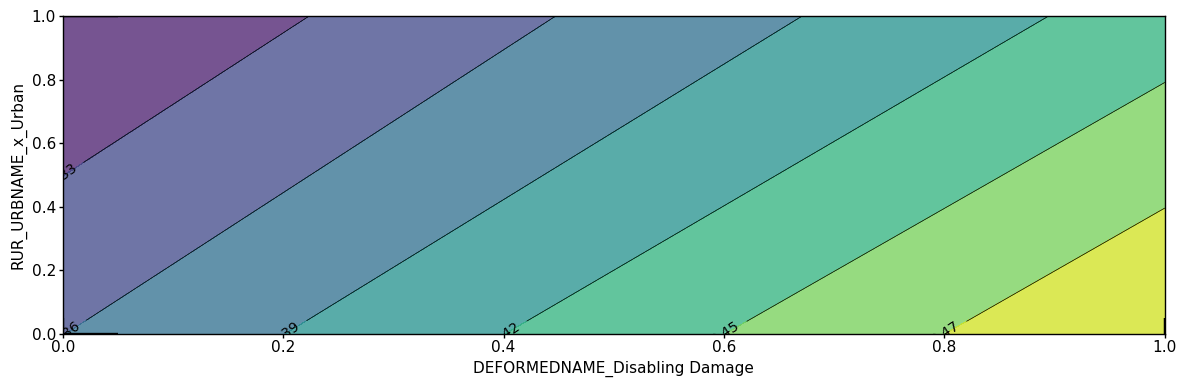

In [286]:

interacted_features = [["DEFORMEDNAME_Disabling Damage", "RUR_URBNAME_x_Urban"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

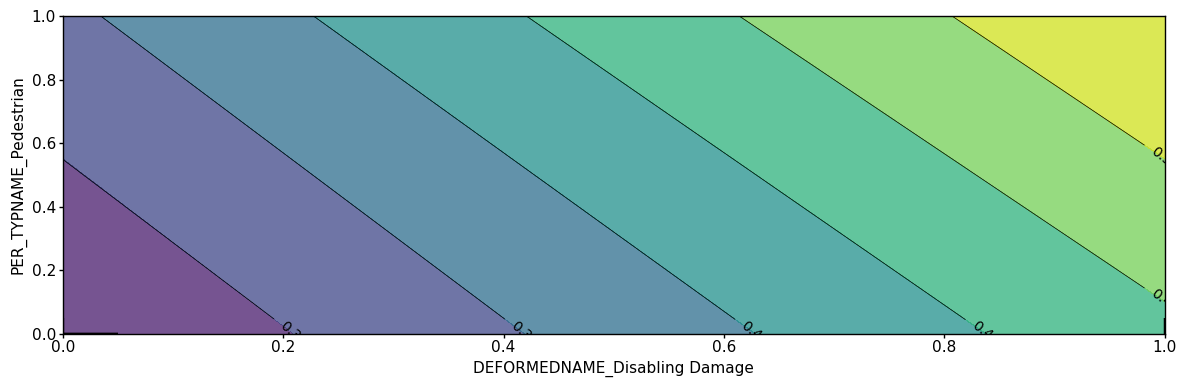

In [287]:
interacted_features = [["DEFORMEDNAME_Disabling Damage", "PER_TYPNAME_Pedestrian"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()


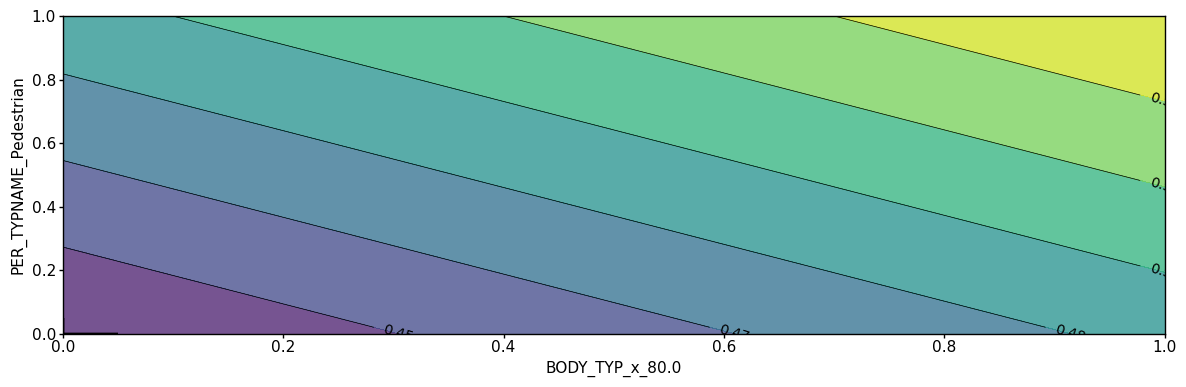

In [291]:
interacted_features = [["BODY_TYP_x_80.0", "PER_TYPNAME_Pedestrian"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

#this is motor cycles 

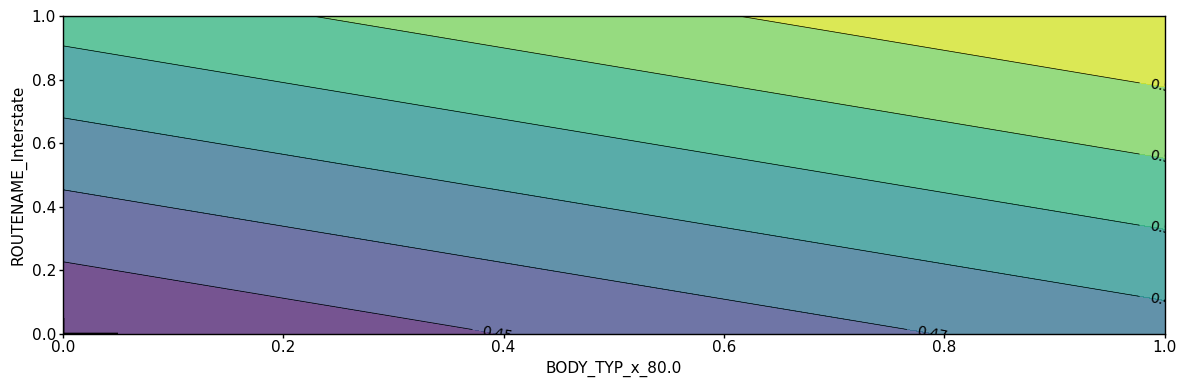

In [295]:
interacted_features = [["BODY_TYP_x_80.0", "ROUTENAME_Interstate"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

#this is motor cycles 

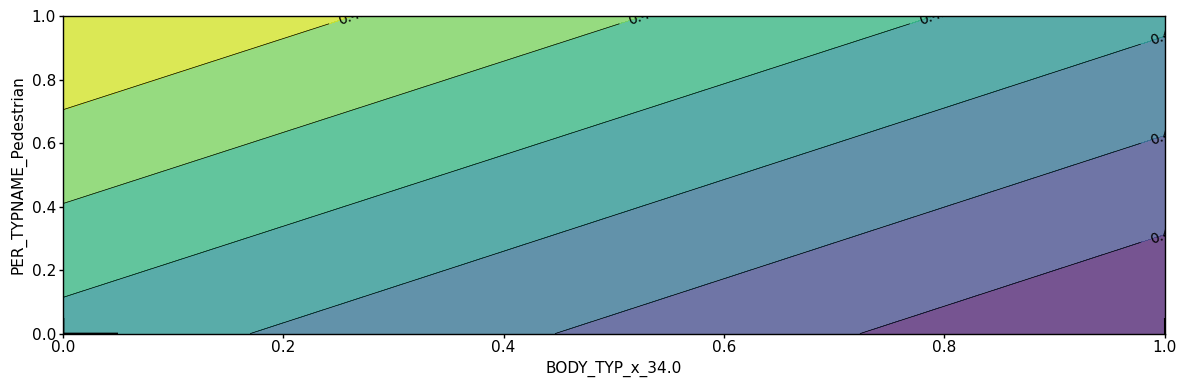

In [296]:
interacted_features = [["BODY_TYP_x_34.0", "PER_TYPNAME_Pedestrian"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

#this is pick-up trucks

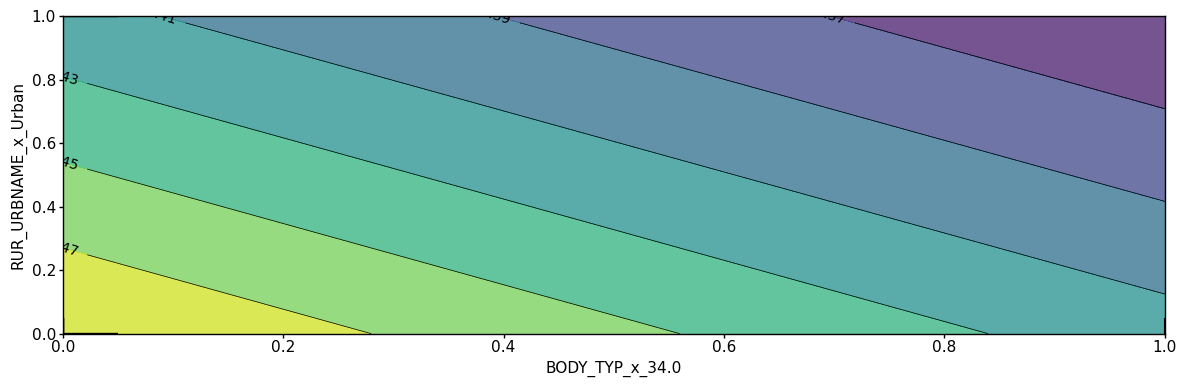

In [297]:
interacted_features = [["BODY_TYP_x_34.0", "RUR_URBNAME_x_Urban"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

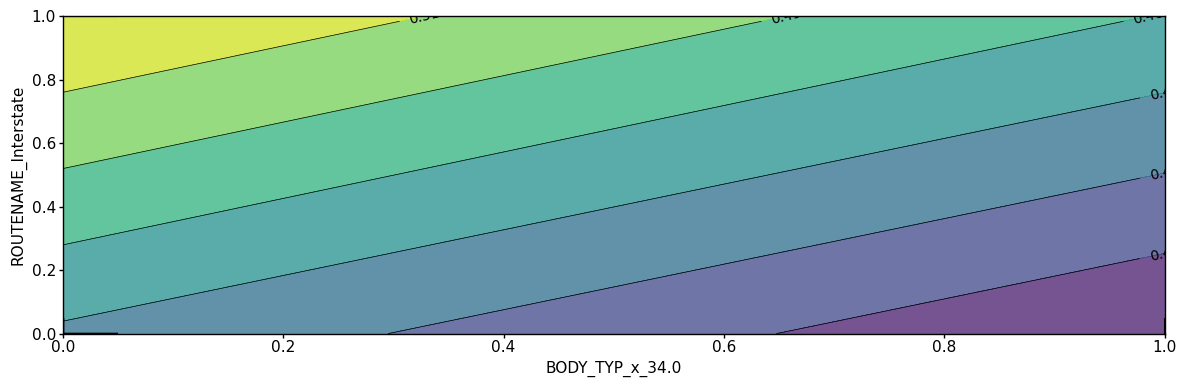

In [300]:
interacted_features = [["BODY_TYP_x_34.0", "ROUTENAME_Interstate"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

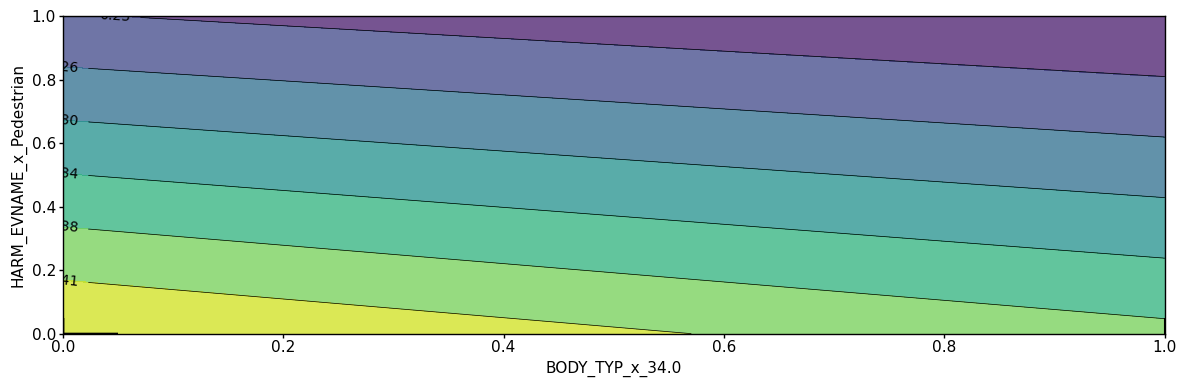

In [304]:

interacted_features = [["BODY_TYP_x_34.0", "HARM_EVNAME_x_Pedestrian"]] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, df_newX, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

In [ ]:
#these pick-up truck plots sort of counter priors. Not seeing fatalities occur rly.